#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>
##### <font color="#03997A"> Mto: Getsemani Ruben Castro Villanueva </font>
##### <font color="#03997A"> Modulo 5 Manipulación de datos en Python</font>
##### <font color="#03997A">Practica 7 Alumno: Ibarra Ramírez Sergio  </font>

In [2]:
import pandas as pd 

titanic_csv = pd.read_csv("titanic.csv")
titanic_csv.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

###Uso de libreria matplot lib

In [3]:
categorias = ['A', 'B', 'C', 'D']
valores = [10,20,40,35]


In [4]:
## Importando la libreria 
import matplotlib.pyplot as plt 

In [5]:
colores=["#03997A", "#335BFF", "red", "#55CC00"]

#### Gráfica de barras

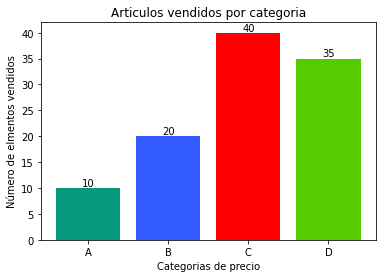

In [6]:
## Gráfica de barras. Se le indica al objeto plt.bar

plt.bar(categorias,valores, color=colores)
plt.xlabel('Categorias de precio')
plt.ylabel('Número de elmentos vendidos')
plt.title('Articulos vendidos por categoria')

# Add the values as labels on top of each bar
for i, v in enumerate(valores):
    plt.text(i, v, str(v), ha='center', va='bottom')


plt.show()


Pasemos a un ejemplo de uso del set de titanic.csv 

<BarContainer object of 891 artists>

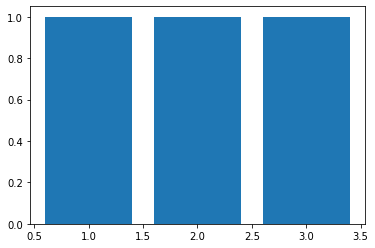

In [7]:
plt.bar(titanic_csv['Pclass'], titanic_csv['Survived'])

In [8]:
##Cuantos viajaron por cada clase 
## Entonces obviamente se agrupo por clase 
## Y una vez agrupados, qu quiero saber? 
## En este caso que me cuente el PassengeId por clase
pasajeros_por_clase = titanic_csv.groupby('Pclass').agg(total_por_clase=('PassengerId','count')).reset_index()
pasajeros_por_clase

Pclass  total_por_clase
0       1              216
1       2              184
2       3              491

In [9]:
pasajeros_por_clase['Pclass'] = pasajeros_por_clase['Pclass'].astype(str)

Text(0.5, 1.0, 'Distribución de pasajeros por clase')

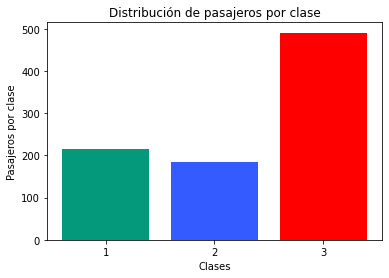

In [10]:
## Ahora hacemos el gráfico de barras de pasajeros por clase

## Gráfica de barras. Se le indica al objeto plt.bar

plt.bar(pasajeros_por_clase['Pclass'],pasajeros_por_clase['total_por_clase'], color=colores)
plt.xlabel('Clases')
plt.ylabel('Pasajeros por clase')
plt.title('Distribución de pasajeros por clase')


In [11]:
## Porcentaje de pasareros por clase 

pasajeros_por_clase.head()

Pclass  total_por_clase
0      1              216
1      2              184
2      3              491

In [12]:
total_pasajeros = pasajeros_por_clase['total_por_clase'].sum()

## Agregamos una olumna a nuestro df 
pasajeros_por_clase['porcentaje_por_clase'] = pasajeros_por_clase['total_por_clase'] / total_pasajeros

pasajeros_por_clase.head()

Pclass  total_por_clase  porcentaje_por_clase
0      1              216              0.242424
1      2              184              0.206510
2      3              491              0.551066

Text(0.5, 1.0, 'Distribución porcentual de pasajeros  por clase')

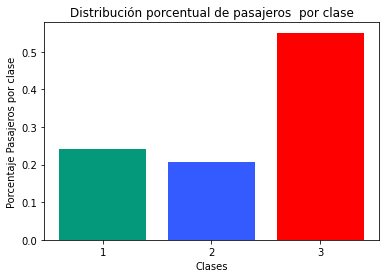

In [13]:
## Ahora hacemos el gráfico de barras de pasajeros por clase

## Gráfica de barras. Se le indica al objeto plt.bar

plt.bar(pasajeros_por_clase['Pclass'],pasajeros_por_clase['porcentaje_por_clase'], color=colores)
plt.xlabel('Clases')
plt.ylabel('Porcentaje Pasajeros por clase')
plt.title('Distribución porcentual de pasajeros  por clase')


### Uso de plotly 

In [14]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import plotly.graph_objects as go

# Crear el gráfico de barras
fig = go.Figure(data=go.Bar(x=pasajeros_por_clase['Pclass'], y=pasajeros_por_clase['porcentaje_por_clase']))

# Personalizar el gráfico
fig.update_layout(
    title='Distribución de pasajeros por clase en titanic',
    xaxis_title='Clase de boleto',
    yaxis_title='Porcentaje de pasajeros por clase de boleto'
)

# Mostrar el gráfico
fig.show()

#### Histogramas 

Ejemplo del histograma con matplotlib.pyplot

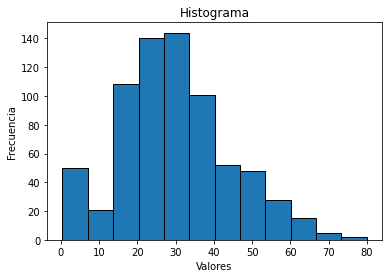

In [21]:
# Crear el histograma
plt.hist(titanic_csv['Age'], bins=12, edgecolor='black')

# Personalizar el gráfico
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma')

# Mostrar el gráfico
plt.show()


In [20]:
titanic_csv['Age'].mean()
titanic_csv['Age'].std()

14.526497332334042

Ejemplo del histograma con plotly

In [23]:
#Plotly grafico de barras:

# Crear el gráfico de histograma
fig = go.Figure(data=go.Histogram(x=titanic_csv['Age'], nbinsx=10, marker=dict(color='green')))

# Personalizar el gráfico
fig.update_layout(
    title='Gráfico de histograma de edad en titanic.csv',
    xaxis_title='Edad',
    yaxis_title='Frecuencia de edad'
)

# Mostrar el gráfico
fig.show()

#### Gráfico de lineas 

In [24]:
import plotly.express as px 

In [26]:
## Importamos los datos a usar 

datos_continente=px.data.gapminder()
datos_continente.head()


country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

In [28]:
datos_continente.describe()

year      lifeExp           pop      gdpPercap      iso_num
count  1704.00000  1704.000000  1.704000e+03    1704.000000  1704.000000
mean   1979.50000    59.474439  2.960121e+07    7215.327081   425.880282
std      17.26533    12.917107  1.061579e+08    9857.454543   248.305709
min    1952.00000    23.599000  6.001100e+04     241.165876     4.000000
25%    1965.75000    48.198000  2.793664e+06    1202.060309   208.000000
50%    1979.50000    60.712500  7.023596e+06    3531.846989   410.000000
75%    1993.25000    70.845500  1.958522e+07    9325.462346   638.000000
max    2007.00000    82.603000  1.318683e+09  113523.132900   894.000000

Eemplo de como traer datos de 200 a 2007

In [35]:
datos_filtrados_por_anio = datos_continente[(datos_continente['year']>2000)& (datos_continente['year']<=2007)] 
datos_filtrados_por_anio

country continent  year  lifeExp       pop    gdpPercap iso_alpha  \
10    Afghanistan      Asia  2002   42.129  25268405   726.734055       AFG   
11    Afghanistan      Asia  2007   43.828  31889923   974.580338       AFG   
22        Albania    Europe  2002   75.651   3508512  4604.211737       ALB   
23        Albania    Europe  2007   76.423   3600523  5937.029526       ALB   
34        Algeria    Africa  2002   70.994  31287142  5288.040382       DZA   
...           ...       ...   ...      ...       ...          ...       ...   
1679  Yemen, Rep.      Asia  2007   62.698  22211743  2280.769906       YEM   
1690       Zambia    Africa  2002   39.193  10595811  1071.613938       ZMB   
1691       Zambia    Africa  2007   42.384  11746035  1271.211593       ZMB   
1702     Zimbabwe    Africa  2002   39.989  11926563   672.038623       ZWE   
1703     Zimbabwe    Africa  2007   43.487  12311143   469.709298       ZWE   

      iso_num  
10          4  
11          4  
22          8  
23          8  
34         12  
...       ...  
1679      887  
1690      894  
1691      894  
1702      716  
1703      716  

[284 rows x 8 columns]

In [36]:
datos_filtrados_por_anio.groupby('year').agg(total_poblacion=('pop', 'sum'))

total_poblacion
year                 
2002       5886977579
2007       6251013179

In [37]:
#Plotly grafico de barras:

# Crear el gráfico de histograma
fig = go.Figure(data=go.Histogram(x=datos_continente['year'], marker=dict(color='silver')))

# Personalizar el gráfico
fig.update_layout(
    title='Gráfico de histograma de datos por año',
    xaxis_title='Año',
    yaxis_title='Frecuencia de datos por año'
)

# Mostrar el gráfico
fig.show()

In [40]:
##Vamos a filtrar de nuevo el año pero ahora de 

datos_filtrados_por_anio2 = datos_continente[(datos_continente['year']>=1987)].reset_index() 
datos_filtrados_por_anio2.head()


index      country continent  year  lifeExp       pop   gdpPercap  \
0      7  Afghanistan      Asia  1987   40.822  13867957  852.395945   
1      8  Afghanistan      Asia  1992   41.674  16317921  649.341395   
2      9  Afghanistan      Asia  1997   41.763  22227415  635.341351   
3     10  Afghanistan      Asia  2002   42.129  25268405  726.734055   
4     11  Afghanistan      Asia  2007   43.828  31889923  974.580338   

  iso_alpha  iso_num  
0       AFG        4  
1       AFG        4  
2       AFG        4  
3       AFG        4  
4       AFG        4

In [49]:
datos_filtrados_por_anio2_frame = datos_filtrados_por_anio2.groupby('year').agg(total_poblacion=('pop', 'sum')).reset_index()
datos_filtrados_por_anio2_frame

year  total_poblacion
0  1987       4691477418
1  1992       5110710260
2  1997       5515204472
3  2002       5886977579
4  2007       6251013179

Text(0.5, 1.0, 'Evolucion de la poblacion mundial por año')

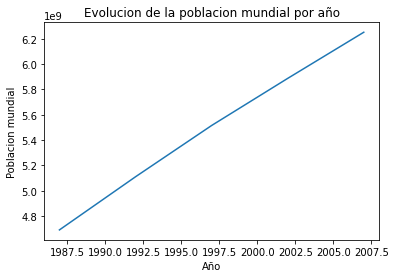

In [56]:
plt.plot(datos_filtrados_por_anio2_frame['year'],datos_filtrados_por_anio2_frame['total_poblacion'])
plt.xlabel('Año')
plt.ylabel('Poblacion mundial')
plt.title('Evolucion de la poblacion mundial por año')


Ejemplo de grafico de linea con Plotly

In [52]:

import plotly.graph_objects as go

# Crear el gráfico de líneas
fig = go.Figure(data=go.Scatter(x=datos_filtrados_por_anio2_frame['year'], y=datos_filtrados_por_anio2_frame['total_poblacion'], mode='lines'))

# Personalizar el gráfico
fig.update_layout(
    title='Gráfico de líneaspoblacion mundial de 1987 a 2005',
    xaxis_title='Año',
    yaxis_title='Poblacion'
)

# Mostrar el gráfico
fig.show()

In [55]:

datos_filtrados_poranio_y_pais = datos_filtrados_por_anio2.groupby(['year','country' ]).agg(total_poblacion=('pop','sum')).reset_index()
datos_filtrados_poranio_y_pais

year             country  total_poblacion
0    1987         Afghanistan         13867957
1    1987             Albania          3075321
2    1987             Algeria         23254956
3    1987              Angola          7874230
4    1987           Argentina         31620918
..    ...                 ...              ...
705  2007             Vietnam         85262356
706  2007  West Bank and Gaza          4018332
707  2007         Yemen, Rep.         22211743
708  2007              Zambia         11746035
709  2007            Zimbabwe         12311143

[710 rows x 3 columns]

Text(0.5, 1.0, 'Evolucion de la poblacion por año por pais')

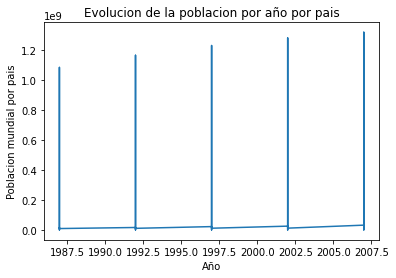

In [57]:
plt.plot(datos_filtrados_poranio_y_pais['year'],datos_filtrados_poranio_y_pais['total_poblacion'])
plt.xlabel('Año')
plt.ylabel('Poblacion mundial por pais')
plt.title('Evolucion de la poblacion por año por pais')


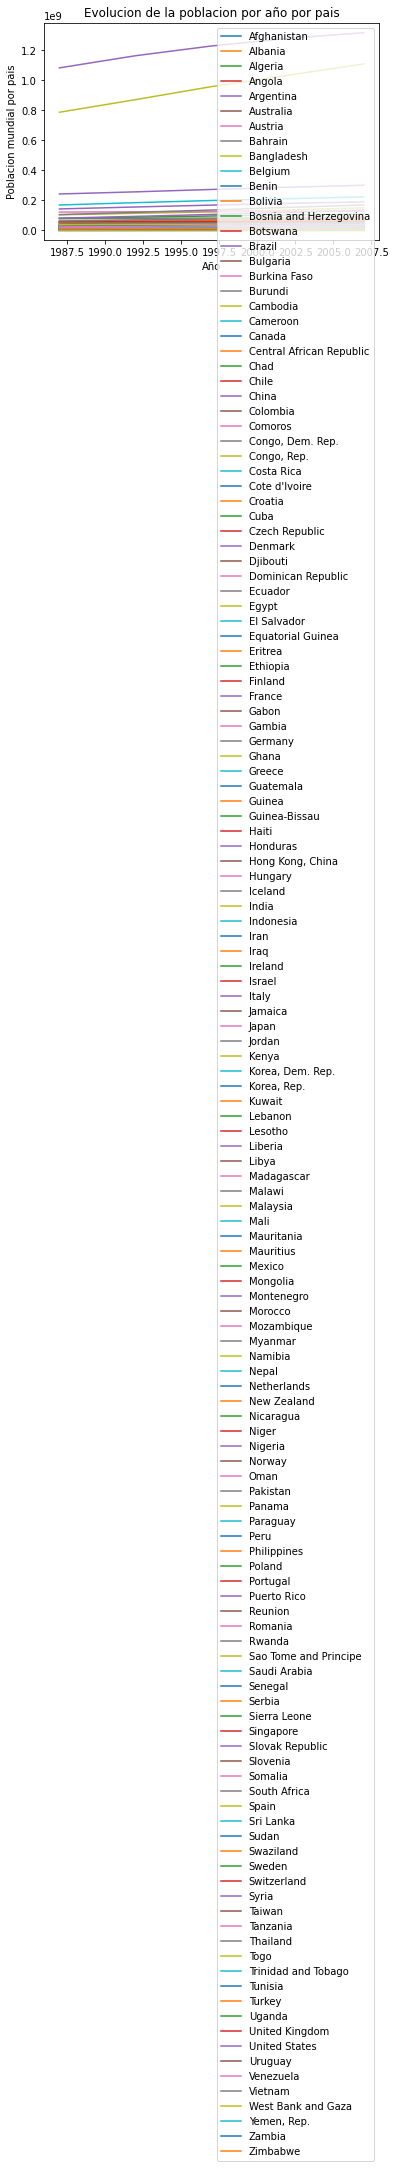

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# Group the data by country
grouped_data = datos_filtrados_poranio_y_pais.groupby('country')

# Create a line plot for each country
for country, data in grouped_data:
    plt.plot(data['year'], data['total_poblacion'], label=country)

plt.xlabel('Año')
plt.ylabel('Poblacion mundial por pais')
plt.title('Evolucion de la poblacion por año por pais')
plt.legend()  # Add a legend to differentiate the countries

plt.show()


### Gráfica animada con Plotly

In [60]:
datos_continente.head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

Rleacion del ingreso percapita y la expectativa de vida

In [64]:
px.scatter(datos_continente, x='gdpPercap', y='lifeExp', animation_frame='year', animation_group='country', size='pop', color='continent', hover_name='country')

In [65]:
px.scatter(datos_continente, x='pop', y='gdpPercap', animation_frame='year', animation_group='country', color='continent', hover_name='country')

In [66]:
px.scatter(datos_continente, x='gdpPercap', y='lifeExp', animation_frame='year', animation_group='country', size='pop', color='continent', hover_name='country', log_x=True)

#### Análisis exploratorio con pandas profiling

In [67]:
titanic_csv.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [69]:
from pandas_profiling import ProfileReport

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

C:\Users\Sergio\AppData\Local\Temp\ipykernel_14096\2274191625.py:1: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



In [72]:
profile_titanic_csv = ProfileReport(titanic_csv)
profile_titanic_csv

Render HTML: 100%|██████████| 1/1 [00:05<00:00,  5.83s/it]


#### Ejemplo de tratameitno de outliers 

In [73]:
datos_continente.describe()

year      lifeExp           pop      gdpPercap      iso_num
count  1704.00000  1704.000000  1.704000e+03    1704.000000  1704.000000
mean   1979.50000    59.474439  2.960121e+07    7215.327081   425.880282
std      17.26533    12.917107  1.061579e+08    9857.454543   248.305709
min    1952.00000    23.599000  6.001100e+04     241.165876     4.000000
25%    1965.75000    48.198000  2.793664e+06    1202.060309   208.000000
50%    1979.50000    60.712500  7.023596e+06    3531.846989   410.000000
75%    1993.25000    70.845500  1.958522e+07    9325.462346   638.000000
max    2007.00000    82.603000  1.318683e+09  113523.132900   894.000000

Vamos a hacer el ProfileReport de los datos_continente 

In [74]:
profile_datos_continente = ProfileReport(datos_continente)
profile_datos_continente

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.21s/it]


Identificar outliers con el rango interquartil (IRQ)

In [88]:
q1_poblacion = datos_continente['pop'].quantile(0.25)
q1_poblacion

q3_poblacion = datos_continente['pop'].quantile(0.75)
q3_poblacion

IQR_poblacion = q3_poblacion - q1_poblacion
IQR_poblacion



### Se calculan los limites inferior y superior como q1/q3 -/+ 1.5*IQR 

limite_inferior_poblacion = q1_poblacion - 1.5*IQR_poblacion

limite_superior_poblacion = q3_poblacion + 1.5*IQR_poblacion
limite_superior_poblacion

44772558.375

##### Ejemplo de gráfico de boxplot en Plotly 

In [84]:

import plotly.graph_objects as go


# Crear el gráfico de boxplot
fig = go.Figure(data=go.Box(y=datos_continente['pop']))

# Personalizar el gráfico
fig.update_layout(
    title='Gráfico de boxplot',
    yaxis_title='Valores'
)

# Mostrar el gráfico
fig.show()

Ahora vamos a fltrar los datos que se salen de los limites inferior y superior

In [89]:
outliers_poblacion = datos_continente[(datos_continente['pop']<limite_inferior_poblacion) | (datos_continente['pop']>limite_superior_poblacion) ]
outliers_poblacion 

country continent  year  lifeExp       pop    gdpPercap iso_alpha  \
96    Bangladesh      Asia  1952   37.484  46886859   684.244172       BGD   
97    Bangladesh      Asia  1957   39.348  51365468   661.637458       BGD   
98    Bangladesh      Asia  1962   41.216  56839289   686.341554       BGD   
99    Bangladesh      Asia  1967   43.453  62821884   721.186086       BGD   
100   Bangladesh      Asia  1972   45.252  70759295   630.233627       BGD   
...          ...       ...   ...      ...       ...          ...       ...   
1651     Vietnam      Asia  1987   62.820  62826491   820.799445       VNM   
1652     Vietnam      Asia  1992   67.662  69940728   989.023149       VNM   
1653     Vietnam      Asia  1997   70.672  76048996  1385.896769       VNM   
1654     Vietnam      Asia  2002   73.017  80908147  1764.456677       VNM   
1655     Vietnam      Asia  2007   74.249  85262356  2441.576404       VNM   

      iso_num  
96         50  
97         50  
98         50  
99         50  
100        50  
...       ...  
1651      704  
1652      704  
1653      704  
1654      704  
1655      704  

[208 rows x 8 columns]

In [92]:

q1=datos_continente[datos_continente['year']==2007]['pop'].quantile(0.25)
q3=datos_continente[datos_continente['year']==2007]['pop'].quantile(0.75)

iqr=q3-q1
#Filtrado de outliers
datos_continente[(datos_continente['year']==2007) & ((datos_continente['pop']<limite_inferior_poblacion) | (datos_continente['pop']>limite_superior_poblacion))]

country continent  year  lifeExp         pop     gdpPercap  \
107         Bangladesh      Asia  2007   64.062   150448339   1391.253792   
179             Brazil  Americas  2007   72.390   190010647   9065.800825   
299              China      Asia  2007   72.961  1318683096   4959.114854   
335   Congo, Dem. Rep.    Africa  2007   46.462    64606759    277.551859   
467              Egypt    Africa  2007   71.338    80264543   5581.180998   
515           Ethiopia    Africa  2007   52.947    76511887    690.805576   
539             France    Europe  2007   80.657    61083916  30470.016700   
575            Germany    Europe  2007   79.406    82400996  32170.374420   
707              India      Asia  2007   64.698  1110396331   2452.210407   
719          Indonesia      Asia  2007   70.650   223547000   3540.651564   
731               Iran      Asia  2007   70.964    69453570  11605.714490   
779              Italy    Europe  2007   80.546    58147733  28569.719700   
803              Japan      Asia  2007   82.603   127467972  31656.068060   
851        Korea, Rep.      Asia  2007   78.623    49044790  23348.139730   
995             Mexico  Americas  2007   76.195   108700891  11977.574960   
1055           Myanmar      Asia  2007   62.069    47761980    944.000000   
1139           Nigeria    Africa  2007   46.859   135031164   2013.977305   
1175          Pakistan      Asia  2007   65.483   169270617   2605.947580   
1223       Philippines      Asia  2007   71.688    91077287   3190.481016   
1535          Thailand      Asia  2007   70.616    65068149   7458.396327   
1583            Turkey    Europe  2007   71.777    71158647   8458.276384   
1607    United Kingdom    Europe  2007   79.425    60776238  33203.261280   
1619     United States  Americas  2007   78.242   301139947  42951.653090   
1655           Vietnam      Asia  2007   74.249    85262356   2441.576404   

     iso_alpha  iso_num  
107        BGD       50  
179        BRA       76  
299        CHN      156  
335        COD      180  
467        EGY      818  
515        ETH      231  
539        FRA      250  
575        DEU      276  
707        IND      356  
719        IDN      360  
731        IRN      364  
779        ITA      380  
803        JPN      392  
851        KOR      410  
995        MEX      484  
1055       MMR      104  
1139       NGA      566  
1175       PAK      586  
1223       PHL      608  
1535       THA      764  
1583       TUR      792  
1607       GBR      826  
1619       USA      840  
1655       VNM      704

In [93]:
#Filtrado de outliers
datos_continente[(datos_continente['year']==2007) & ((datos_continente['pop']<limite_inferior_poblacion) | (datos_continente['pop']>limite_superior_poblacion))].mean()

C:\Users\Sergio\AppData\Local\Temp\ipykernel_14096\1911402926.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



year         2.007000e+03
lifeExp      7.020458e+01
pop          1.998881e+08
gdpPercap    1.254266e+04
iso_num      4.405417e+02
dtype: float64